In [98]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [99]:
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import pickle

In [100]:
df = pd.read_csv('cleaned_IBM_attrition_df.csv')
df.shape

(1470, 59)

In [101]:
y = df.Attrition
X = df.drop('Attrition', axis=1)

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 5454, stratify= df.Attrition)
print( len(X_train), len(X_test), len(y_train), len(y_test))

1176 294 1176 294


In [104]:
print(y_train.describe())
print(y_test.describe())

count    1176.000000
mean        0.161565
std         0.368208
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Attrition, dtype: float64
count    294.000000
mean       0.159864
std        0.367105
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Attrition, dtype: float64


In [105]:
X_train.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.770408,801.102041,9.267857,2.909014,1.0,1026.936224,2.715986,65.999150,2.725340,2.060374,...,0.095238,0.055272,0.192177,0.227891,0.059524,0.222789,0.467687,0.309524,0.723639,0.276361
std,9.048992,399.991995,8.185229,1.026983,0.0,600.554759,1.087312,20.369585,0.714759,1.101146,...,0.293668,0.228608,0.394179,0.419650,0.236703,0.416295,0.499167,0.462494,0.447388,0.447388
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,469.000000,2.000000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,796.000000,7.000000,3.000000,1.0,1025.500000,3.000000,66.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,42.250000,1153.250000,14.000000,4.000000,1.0,1557.250000,4.000000,84.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,60.000000,1498.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
X_test.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
count,294.000000,294.000000,294.000000,294.000000,294.0,294.000000,294.000000,294.000000,294.000000,294.000000,...,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,37.537415,808.020408,8.891156,2.928571,1.0,1016.581633,2.744898,65.459184,2.748299,2.078231,...,0.112245,0.051020,0.224490,0.197279,0.044218,0.221088,0.418367,0.360544,0.690476,0.309524
std,9.463977,417.935156,7.791769,1.014401,0.0,608.827911,1.117450,20.196730,0.699522,1.131613,...,0.316206,0.220415,0.417957,0.398623,0.205929,0.415687,0.494132,0.480977,0.463086,0.463086
min,18.000000,103.000000,1.000000,1.000000,1.0,5.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,447.250000,2.000000,2.000000,1.0,479.750000,2.000000,49.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,815.000000,7.000000,3.000000,1.0,995.500000,3.000000,65.500000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,43.750000,1170.000000,13.000000,4.000000,1.0,1553.500000,4.000000,82.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2060.000000,4.000000,100.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [108]:
pipelines = {
    'l1' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=545)),
    'l2' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=545)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=545)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=545))
}

In [109]:
pipelines['l1'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('logisticregression',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
             penalty='l1', random_state=545, solver='liblinear', tol=0.0001,
             verbose=0, warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=545, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logis

In [110]:
l1_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10)
}
l2_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10)
}

In [111]:
pipelines['rf'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('randomforestclassifier',
   RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
               max_depth=None, max_features='auto', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
               oob_score=False, random_state=545, verbose=0, warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_j

In [112]:
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
}

In [113]:
pipelines['gb'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('gradientboostingclassifier',
   GradientBoostingClassifier(criterion='friedman_mse', init=None,
                 learning_rate=0.1, loss='deviance', max_depth=3,
                 max_features=None, max_leaf_nodes=None,
                 min_impurity_decrease=0.0, min_impurity_split=None,
                 min_samples_leaf=1, min_samples_split=2,
                 min_weight_fraction_leaf=0.0, n_estimators=100,
                 presort='auto', random_state=545, subsample=1.0, verbose=0,
                 warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'gradientboostingclassifier': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
   

In [114]:
gb_hyperparameters = {
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5],
    'gradientboostingclassifier__n_estimators': [100, 200]
}

In [115]:
hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
fitted_models = {}
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, refit=True, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(name, ' has been fitted')

l1  has been fitted
l2  has been fitted
rf  has been fitted
gb  has been fitted


In [118]:
for name, model in fitted_models.items():
    print(name, model.best_score_)
    print(model.best_estimator_)

l1 0.873299319728
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=222.22300000000001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=545,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])
l2 0.873299319728
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=111.11200000000001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=545,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])
rf 0.857993197279
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), 

In [119]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [130]:
pred = fitted_models['gb'].predict(X_test)
print(pred[:10])

[1 0 0 1 1 0 0 0 0 0]


In [131]:
print( confusion_matrix(y_test, pred))

[[243   4]
 [ 27  20]]


In [144]:
prob = fitted_models['gb'].predict_proba(X_test)

pos_prob = [p[1] for p in prob]
neg_prob = [p[0] for p in prob]

print(pos_prob[:10])
print(neg_prob[:10])

[0.68656569129734002, 0.015582010048803651, 0.2128294743940449, 0.87281641884653838, 0.88092111226327108, 0.49257508997178501, 0.24047342173860209, 0.11269659239689238, 0.13444563749624633, 0.016258033570131204]
[0.31343430870265998, 0.98441798995119634, 0.78717052560595513, 0.12718358115346162, 0.11907888773672892, 0.50742491002821499, 0.75952657826139791, 0.88730340760310766, 0.86555436250375362, 0.98374196642986877]


In [145]:
fpr, tpr, thresholds = roc_curve(y_test, pos_prob)
fnr, tnr, n_thresholds = roc_curve((1-y_test), neg_prob)

In [139]:
pd.DataFrame({'FPR': fpr, 'TPR' : tpr, 'Thresholds' : thresholds}).tail(10)

,FPR,TPR,Thresholds
41,0.449393,0.914894,0.082990
42,0.566802,0.914894,0.061973
43,0.566802,0.936170,0.061565
44,0.615385,0.936170,0.053370
45,0.615385,0.957447,0.052909
46,0.655870,0.957447,0.046318
47,0.655870,0.978723,0.046041
48,0.829960,0.978723,0.022905
49,0.829960,1.000000,0.022524
50,1.000000,1.000000,0.005740


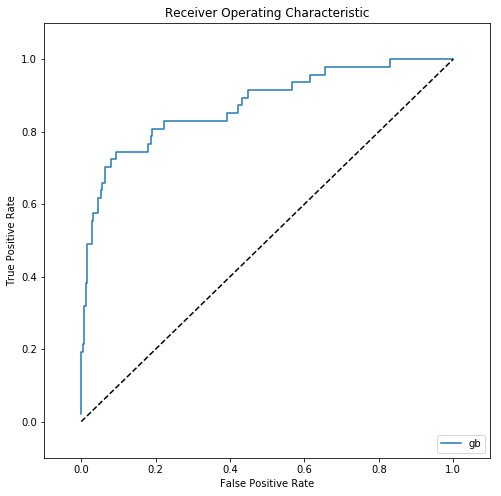

In [140]:
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, label='gb')
plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'k--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

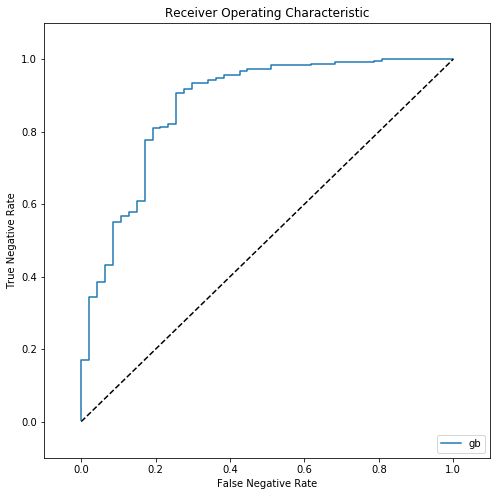

In [141]:
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

plt.plot(fnr, tnr, label='gb')
plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'k--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Negative Rate')
plt.xlabel('False Negative Rate')
plt.show()

In [142]:
print( auc(fpr, tpr))
print( auc(fnr, tnr))

0.873977086743
0.873977086743


In [128]:
for name, model in fitted_models.items():
    prob = fitted_models[name].predict_proba(X_test)
    pos_prob = [p[1] for p in prob]
    fpr, tpr, thresholds = roc_curve(y_test, pos_prob)
    print( name, auc(fpr, tpr))

l1 0.855715393229
l2 0.855715393229
rf 0.832974416401
gb 0.873977086743


In [129]:
with open('final_IBM_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['gb'].best_estimator_, f)